In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import os

-0.03577446594999998 0.9505995159999995


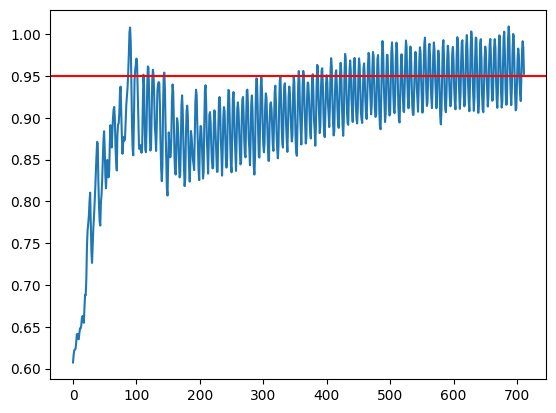

In [165]:
coeffs = np.loadtxt("../runs/GRTsteady4/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-200:], axis=0)

plt.plot(coeffs[10:,3])
plt.axhline(y=coeff[3], c='r')
print(coeff[2], coeff[3])

In [2]:
def getMeshSize(sweepdir):
    cwd = os.getcwd()
    files = np.array(os.listdir(sweepdir))
    sizes = np.zeros(len(files))
    for i, file in enumerate(files): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            sizes[i] = float(lines[30][10:])
            file.close()
        os.chdir(cwd)
    return files, sizes

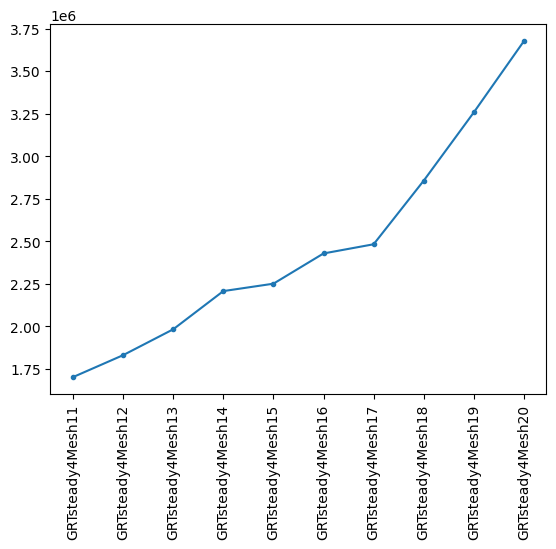

[1700621. 1829677. 1981818. 2206460. 2249975. 2427805. 2481820. 2855975.
 3257570. 3676621.]


In [3]:
files, sizes = getMeshSize("../meshsweepfine")
plt.plot(sizes[sizes.argsort()], marker=".")
plt.xticks(range(0,len(files)), files[sizes.argsort()], rotation=90)
plt.show()
print(sizes[sizes.argsort()])

In [4]:
def plot_coeffs(sweepdir):
    
    cwd = os.getcwd()
    files = os.listdir(sweepdir)
    coefficients = np.zeros((len(files),3))
    sizes = np.zeros(len(files))
    for i,file in enumerate(sorted(files)): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            coefficients[i,0] = float(lines[30][10:])
            sizes[i] = float(lines[30][10:])
            file.close()
        coefs = np.loadtxt("postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9 , delimiter="\t")
        coefficients[i,1:] = np.mean(coefs[-175:,2:4], axis=0)
        os.chdir(cwd)
    return sorted(files),sizes, coefficients

In [5]:
files, sizes, coeffs = plot_coeffs("../meshsweep")
plt.plot(sizes, marker=".")
plt.xticks(range(0,len(files)), files, rotation=50)
plt.show()
coeffs = coeffs[coeffs[:,0].argsort()]
plt.scatter(coeffs[:,0], coeffs[:,2],marker=".")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../meshsweep'

In [ ]:
coeffs = np.loadtxt("../meshsweep/GRTsteady4Mesh12/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-50:], axis=0)
print(coeff[3], coeff[2])
plt.figure(figsize=(6,4), dpi=110)
plt.plot(coeffs[10:,3])
plt.show()
plt.plot(coeffs[10:,2])

